<a href="https://colab.research.google.com/github/mgt412/course_notebooks/blob/master/MGT412_Lecture_4_HighFrequencyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 4: High-Frequency Data and `matplotlib` 

## Working with dates and times

The relevant module for working with date-time objects is` datetime`.

Seven fields in a **datetime** object :` year, month, day, hour, minute, second, microseconds`.

In [1]:
import datetime as dt
d=dt.datetime.now()
d

datetime.datetime(2019, 6, 28, 19, 17, 47, 98742)

In [2]:
# individual date fields
d.year, d.month, d.day, d.hour, d.microsecond

(2019, 6, 28, 19, 98742)

In [3]:
# GMT time
dt.datetime.utcnow()

datetime.datetime(2019, 6, 28, 19, 17, 47, 122688)

`timedelta` objects: subtracting two time objects creates a new type. 

How long did it take me to present this slide?

In [4]:
# Timedelta objects: difference between two times
d1=dt.datetime.now()
diff=d1-d
diff

datetime.timedelta(0, 0, 39385)

## High-frequency data

We will work with high-frequency trading data, downloaded from
Thomson Reuters Tick History. Concretely, all the trade and quotes
from July 2009 on NASDAQ OMX Stockholm for three stocks:
1. **H&M** (NORDIC_TS_2009-07-HMb.ST)
2. **Nokia** (NORDIC_TS_2009-07-NOKI.ST)
3. **Volvo** (NORDIC_TS_2009-07-VOLVb.ST)

### Task #1

1. Merge all three stock files into a single DataFrame object.
2. How many observations are there in total?
3. What variables does the dataset contain?

In [0]:
from pandas import *
# Task 1: Merge three files
list_stocks=['HMb.ST', 'NOKI.ST', 'VOLVb.ST'] 
fname='https://github.com/mgt412/course_notebooks/blob/master/Datasets/NORDIC_TS_20090712-2009-07-%s_v1.csv?raw=true'

#del Data
for stock in list_stocks:
    Temp=read_csv(fname%stock)
    try:
      Data=Data.append(Temp, ignore_index=True)
    except:
      Data=Temp
      
del Data['Unnamed: 0'] # redundant column

In [7]:
Data.columns.tolist()

['#RIC',
 'Date[G]',
 'Time[G]',
 'GMT Offset',
 'Type',
 'Ex/Cntrb.ID',
 'Price',
 'Volume',
 'Buyer ID',
 'Bid Price',
 'Bid Size',
 'No. Buyers',
 'Seller ID',
 'Ask Price',
 'Ask Size',
 'No. Sellers',
 'Qualifiers',
 'Exch Time']

In [8]:
Data.head()

,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,Bid Price,Bid Size,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time
0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,385.0,3370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,3868.0,NaN,NaN,NaN
2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3888.0,NaN,NaN,NaN
3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4938.0,NaN,NaN,NaN
4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4688.0,NaN,NaN,NaN


In [9]:
Data.count()

#RIC           150000
Date[G]        150000
Time[G]        150000
GMT Offset     150000
Type           150000
Ex/Cntrb.ID         0
Price           13681
Volume          13681
Buyer ID        13672
Bid Price        9568
Bid Size        61615
No. Buyers          0
Seller ID       13672
Ask Price        8660
Ask Size        74734
No. Sellers         0
Qualifiers      13681
Exch Time       13681
dtype: int64

### Dates in pandas
Data objects in pandas have the Timestamp type. Conversion:

1. From `datetime` to `Timestamp`: **Timestamp(d)**
2. From `Timestamp` to `datetime`: **ts.to_datetime()**

Data objects in numpy have the datetime64 type. Conversion:

1. From `datetime` to `datetime64`: **d64=np.datetime64(d)**
2. From `datetime64` to `datetime`: **d=d64.astype(dt.datetime)**

Plotting support with datetime64 is limited in matplotlib - it is better to convert the timestamps before!


### Task #2
1. Create a column "DT" with the date and time of the message in the `datetime` format.
*Hint: use a user defined function.*
2. Create a column "TS" with the date and time of the message in the `timestamp` format.

In [0]:
# Task 2
def mergedate(x):
    return dt.datetime.strptime(x, "%Y%m%d%H:%M:%S.%f") 
Data['DateS']=Data['Date[G]'].map(str)+Data['Time[G]']
Data['TS']=Data['DateS'].map(mergedate)
Data['DT']=Data['TS'].map(to_datetime)

In [11]:
Data.head()

,#RIC,Date[G],Time[G],GMT Offset,Type,Ex/Cntrb.ID,Price,Volume,Buyer ID,Bid Price,Bid Size,No. Buyers,Seller ID,Ask Price,Ask Size,No. Sellers,Qualifiers,Exch Time,DateS,TS,DT
0,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,385.0,3370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
1,HMb.ST,20090701,06:44:59.598514,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,3868.0,NaN,NaN,NaN,2009070106:44:59.598514,2009-07-01 06:44:59.598514,2009-07-01 06:44:59.598514
2,HMb.ST,20090701,06:49:43.089521,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3888.0,NaN,NaN,NaN,2009070106:49:43.089521,2009-07-01 06:49:43.089521,2009-07-01 06:49:43.089521
3,HMb.ST,20090701,06:50:27.336043,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4938.0,NaN,NaN,NaN,2009070106:50:27.336043,2009-07-01 06:50:27.336043,2009-07-01 06:50:27.336043
4,HMb.ST,20090701,06:50:28.333304,2,Quote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4688.0,NaN,NaN,NaN,2009070106:50:28.333304,2009-07-01 06:50:28.333304,2009-07-01 06:50:28.333304


## Data visualization in *matplotlib*

Useful functions and methods

1. **Plot function**: `plt.plot(y,x, options)`
2. **Add a grid**: `plt.grid()`
3. **Custom axis limits**: `plt.xlim(xmin, xmax)`
4. "**Tight" axes:** `plt.axis(’tight’)`
5. **Axes labels**: `plt.xlabel(), plt.ylabel()`
6. **Add a title**: `plt.title()`
7. **Show the plot**: `plt.show()`
8. **Save the plot**: `plt.save(path)`

| Plot option   | Python syntax |   
|-------|----------|
| Color | c= or color= | 
|  Line width | lw= or linewidth= |
| Line style | ls= or linestyle=| 


Colors and styles:

| Color | Styles |
|-------|----------|
**b** blue | **-** solid |
**g** green | **--** dashed |
**r** red | ** -.** dash-dot |
**k** black | **:** dotted |
**c** cyan | **.** point marker |
**m** magenta | **o $< >$ +** other markers |


In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

### Task #3
Plot the NOKIA trade prices time series for July 1, 2009.
Label the axes and give the figure an appropriate title.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'NOKIA transaction prices on July 1, 2009')

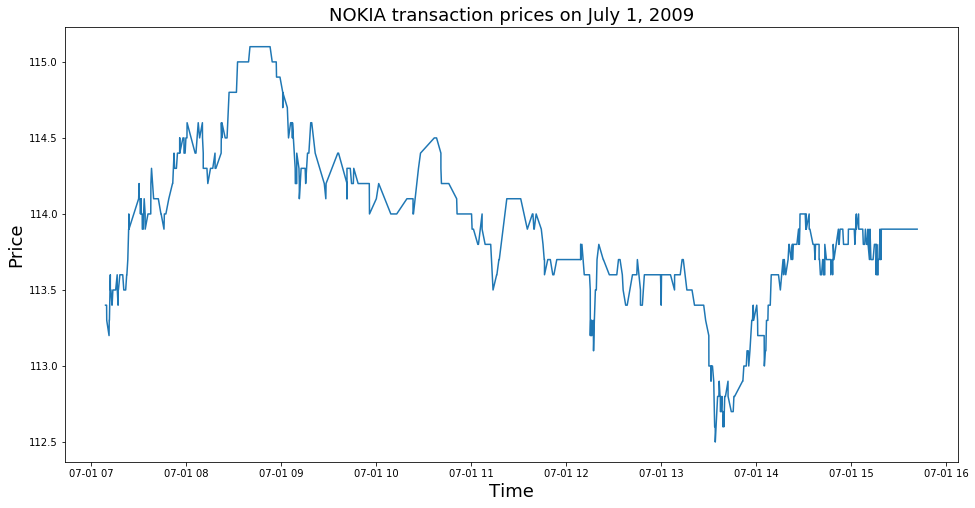

In [13]:
# Task 3
Noki=Data[(Data["#RIC"]=="NOKI.ST") & (Data["Date[G]"]==20090701) & (Data["Type"]=="Trade")]
Noki=Noki.sort_values(by='TS') # sort values ascending by time
plt.figure(figsize=(16,8))
plt.plot(Noki['TS'], Noki["Price"]) 
plt.xlabel("Time", fontsize=18) 
plt.ylabel("Price", fontsize=18) 
plt.title("NOKIA transaction prices on July 1, 2009", fontsize=18)

### Figures in pyplot
A figure contains one or more plotted series. We define the figure size as follows:
> `plt.figure (figsize =(7 ,4)) # add figure size`

**Legend**
> `plt . legend (loc=’best ’, fontsize =18)`

Legend location(loc) can take multiple values: `’best’, ’upper right’, ’center left’, ’lower right’, ’center’.`..

Plotted series **labels** given by option `label=`.

### Task 4: Legends and multiple plots

1. Plot the NOKIA trade prices, bid and ask quotes time series for July 1, 2009. *Hint: clean quote data of zeros and NaN*.

2. Create an appropriate legend in the lower right corner.
3. Label the axes and give the figure an appropriate title.

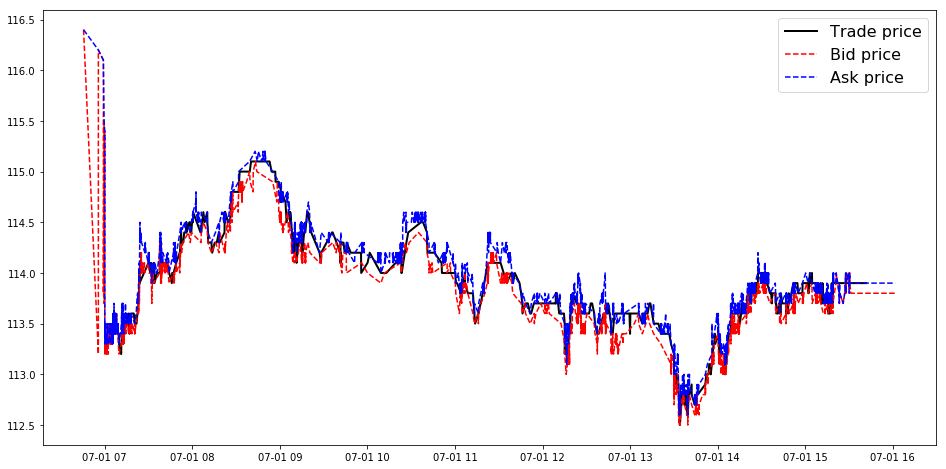

In [14]:
# Task 4
plt.figure(figsize=(16,8))
NokiQ=Data[(Data["#RIC"]=="NOKI.ST") & (Data["Date[G]"]==20090701) & (Data["Type"]=="Quote")]
NokiQ=NokiQ.sort_values(by='TS') # sort values ascending by time
plt.plot(Noki["DT"],Noki["Price"],label='Trade price',c='k',lw=2) 
plt.plot(NokiQ[NokiQ["Bid Price"]>0]["DT"], NokiQ[NokiQ["Bid Price"]>0]["Bid Price"].dropna(),label='Bid price',c='r',lw=1.5,ls='--')
plt.plot(NokiQ[NokiQ["Ask Price"]>0]["DT"], NokiQ[NokiQ["Ask Price"]>0]["Ask Price"].dropna(), label='Ask price',c='b',lw=1.5,ls='--')
plt.legend(loc='best', fontsize=16)

### Two-axes plot

Let us plot both volumes and transaction prices for Nokia. Of course, they have different scales.
We need to duplicate the y-axis, while keeping the x-axis the same `(twinx)`.

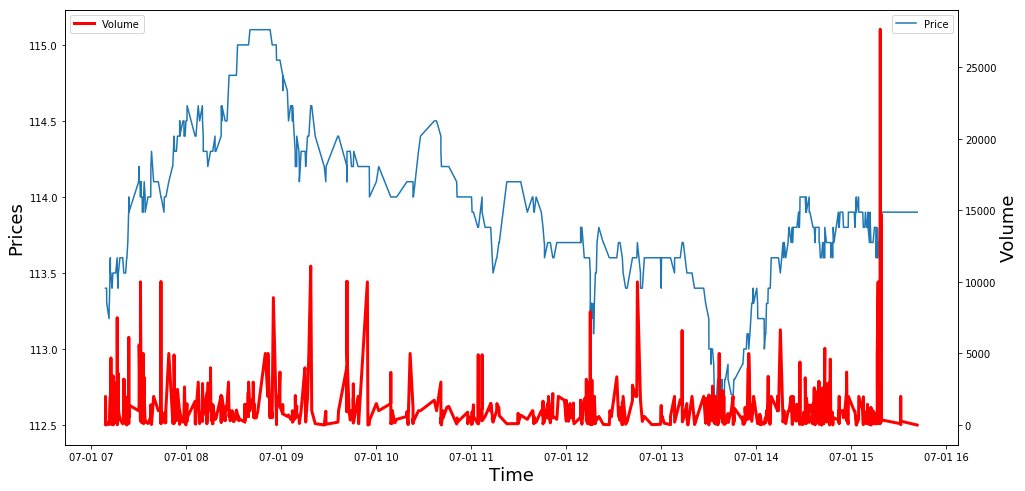

In [15]:
# Two axes plot
fig, ax1=plt.subplots(figsize=(16,8))
plt.plot(Noki["DT"],Noki["Price"], label="Price")
plt.xlabel('Time', fontsize=18)
plt.ylabel('Prices', fontsize=18)

plt.legend(loc='best') 


ax2=ax1.twinx()
plt.plot(Noki["DT"],Noki["Volume"], label="Volume",c='r',lw=3)
plt.ylabel('Volume', fontsize=18)

plt.legend(loc='best') 

### Two subplots

1. Let us plot both volumes and transaction prices for Nokia, now in two different subplots. 
2. We use `plt.subplot(NCR)`where N = C × R (number of plots = columns times rows). 
3. The subplot method generates a collection of N plots of C columns and R rows.

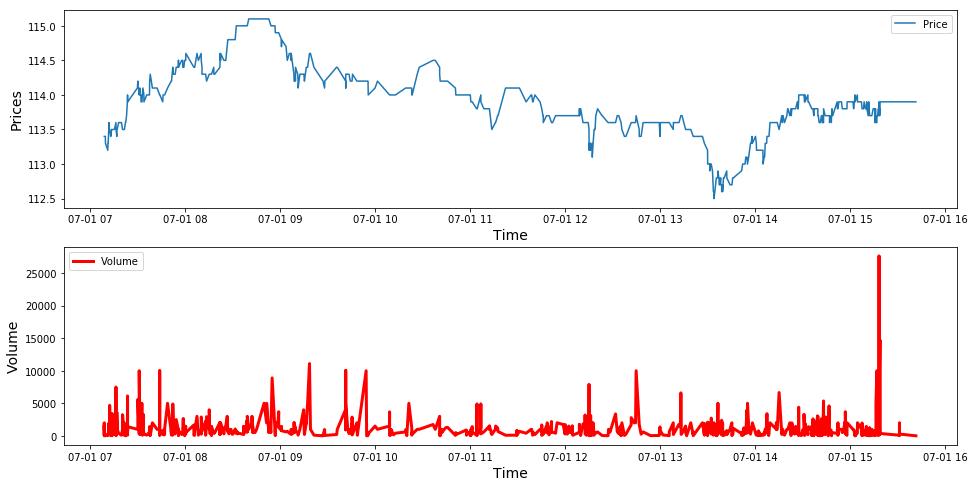

In [16]:
# Two subplots
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.plot(Noki["DT"],Noki["Price"], label="Price")
plt.xlabel('Time', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.legend(loc='best')

plt.subplot(212)
plt.plot(Noki["DT"],Noki["Volume"], label="Volume",c='r',lw=3)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(loc='best') 

### Histogram

1. Histograms in pyplot are generated by the function `plt.hist`.
2. Pandas series’ index need to be reset in order to work.
3.  The fineness of the grid can be fine-tuned through the option `bins=`.

(array([  2.,  16.,   0.,  32.,   0.,  38.,   0.,  22.,   0.,  66.,   0.,
         16.,   0.,  58.,   0.,  52.,   0., 108.,   0., 136.,   0., 156.,
          0., 218.,   0., 188., 154.,   0., 154.,   0.,  58.,   0.,  84.,
          0.,  68.,   0.,  64.,   0.,  44.,   0.,  22.,   0.,   6.,   0.,
         22.,   0.,  12.,   0.,  40.,  28.]),
 array([112.5  , 112.552, 112.604, 112.656, 112.708, 112.76 , 112.812,
        112.864, 112.916, 112.968, 113.02 , 113.072, 113.124, 113.176,
        113.228, 113.28 , 113.332, 113.384, 113.436, 113.488, 113.54 ,
        113.592, 113.644, 113.696, 113.748, 113.8  , 113.852, 113.904,
        113.956, 114.008, 114.06 , 114.112, 114.164, 114.216, 114.268,
        114.32 , 114.372, 114.424, 114.476, 114.528, 114.58 , 114.632,
        114.684, 114.736, 114.788, 114.84 , 114.892, 114.944, 114.996,
        115.048, 115.1  ]),
 <a list of 50 Patch objects>)

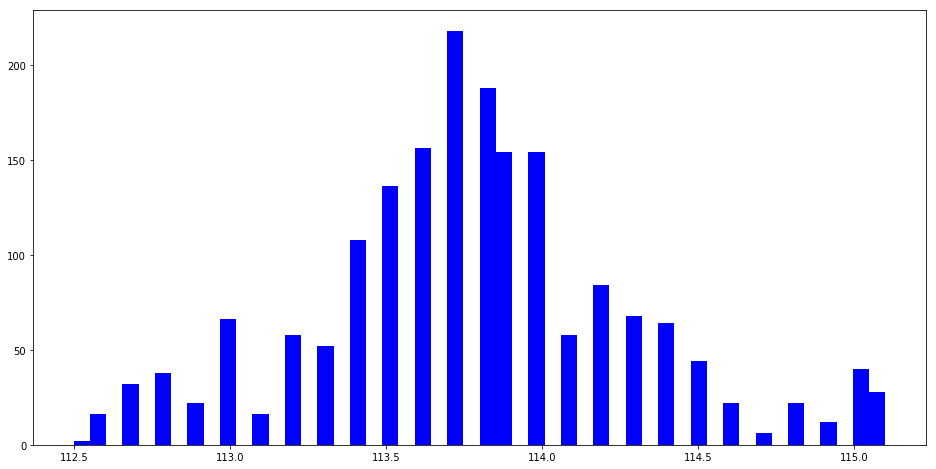

In [17]:
plt.figure(figsize=(16,8))
plt.hist(Noki['Price'].reset_index()['Price'], label='Prices', color='b', bins=50)

### Scatterplot

1. Scatterplots in pyplot are generated by the function `plt.scatter(x,y)`.
2. Pandas series’ index do not need to be reset in order to work.
3. Markers can be changed through the option `marker=`.
4. The size of the marker can be made proportional to another variable, via option `s=`

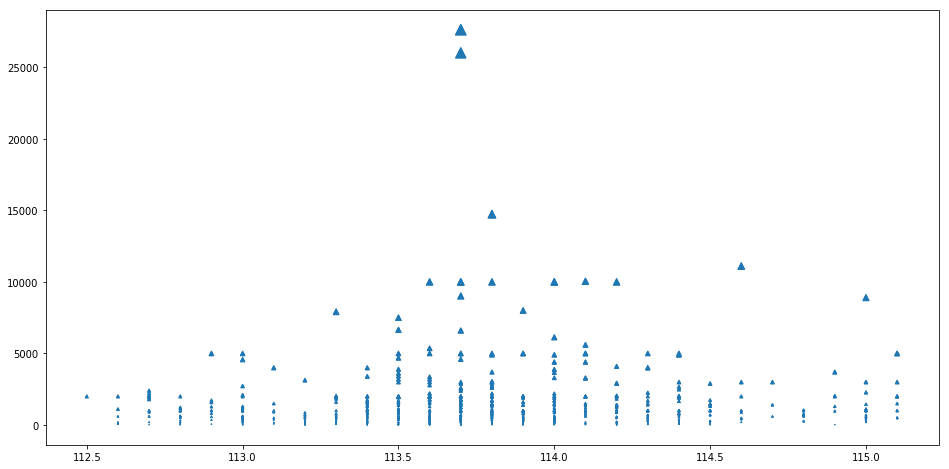

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(Noki['Price'], Noki['Volume'], marker='^', s=Noki['Volume']/250)

### 3-D plots

We want to plot the 2-variable function:

$$ f\left(x\right)=x^2+y^2$$ 

for $x\in\left[-10,10\right]$ and  $y\in\left[-10,10\right]$

First, we define the function in Python:

In [0]:
def func_3D(x,y):
    return x**2+y**2

Next, we define the space for x and y as linear spaces with 100 points:

In [0]:
xspace=np.linspace(-10,10, 100)
yspace=np.linspace(-10,10, 100)

The next step is to create a "mesh", a two-dimensional grid. That is, we "copy" the xspace for all possible y-values and the other ways round.

In [0]:
xspace, yspace=np.meshgrid(xspace, yspace)

We want to "tell" Python to use a 3D-graph. This is done as follows, using the `mplot3d` library:

In [0]:
from mpl_toolkits import mplot3d

And, finally, we finish the plot:

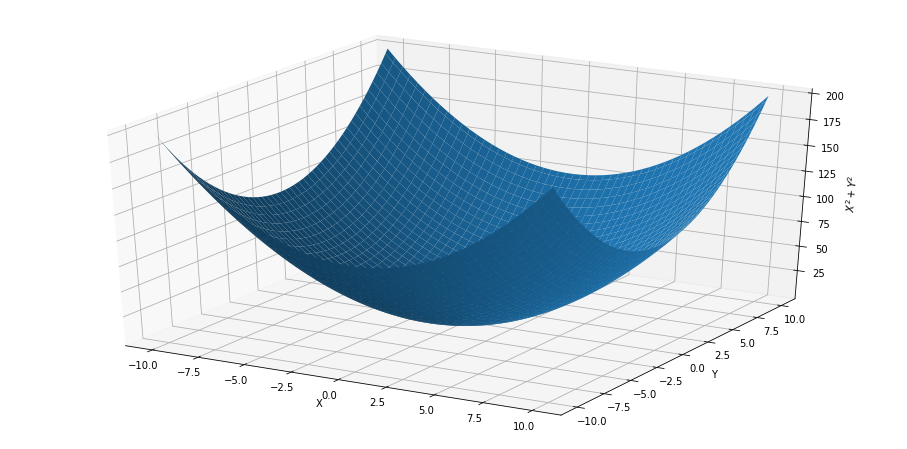

In [29]:
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r'$X^2+Y^2$')
ax.plot_surface(xspace, yspace, func_3D(xspace, yspace))

In [0]:
TSX=read_csv("https://raw.githubusercontent.com/mgt412/course_notebooks/master/Datasets/%5EGSPTSE.csv")
TSX.head()
TSX['Date']=TSX['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [34]:
pip install mpl_finance

  Stored in directory: /root/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


[Text(0, 0, '2018-06-28'),
 Text(0, 0, '2018-06-29'),
 Text(0, 0, '2018-07-03'),
 Text(0, 0, '2018-07-04'),
 Text(0, 0, '2018-07-05'),
 Text(0, 0, '2018-07-06'),
 Text(0, 0, '2018-07-09'),
 Text(0, 0, '2018-07-10')]

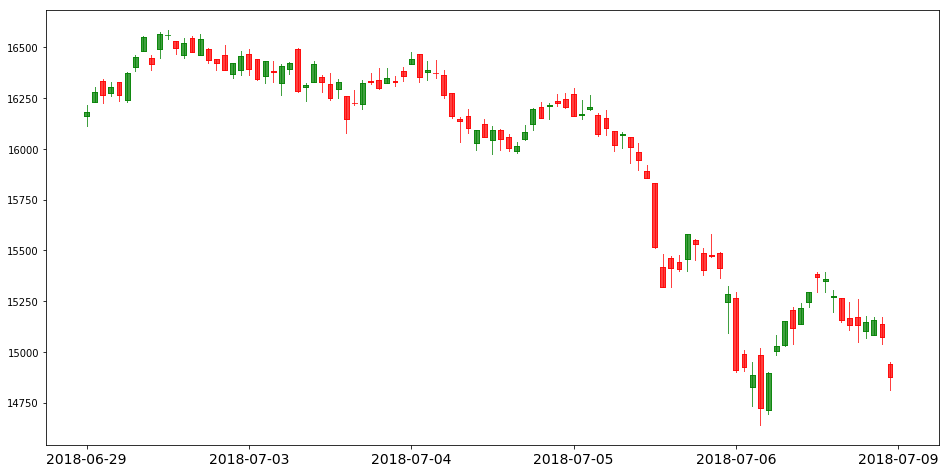

In [97]:
import mpl_finance as f
fig, ax = plt.subplots(figsize=(16,8))
TSX=TSX[0:100]

xx=TSX[['Open','Close','High','Low']].copy()

f.candlestick2_ochl(ax, TSX['Open'], TSX['Close'], TSX['High'], TSX['Low'], width=.6, colorup='green', colordown='red')
ax.set_xticklabels(TSX['Date'].apply(lambda x: x.strftime("%Y-%m-%d")),fontsize=14)

**How to get help?**

In [0]:
?f.candlestick_ochl

0      2018-06-28
1      2018-06-29
2      2018-07-03
3      2018-07-04
4      2018-07-05
5      2018-07-06
6      2018-07-09
7      2018-07-10
8      2018-07-11
9      2018-07-12
10     2018-07-13
11     2018-07-16
12     2018-07-17
13     2018-07-18
14     2018-07-19
15     2018-07-20
16     2018-07-23
17     2018-07-24
18     2018-07-25
19     2018-07-26
20     2018-07-27
21     2018-07-30
22     2018-07-31
23     2018-08-01
24     2018-08-02
25     2018-08-03
26     2018-08-07
27     2018-08-08
28     2018-08-09
29     2018-08-10
          ...    
222    2019-05-17
223    2019-05-21
224    2019-05-22
225    2019-05-23
226    2019-05-24
227    2019-05-27
228    2019-05-28
229    2019-05-29
230    2019-05-30
231    2019-05-31
232    2019-06-03
233    2019-06-04
234    2019-06-05
235    2019-06-06
236    2019-06-07
237    2019-06-10
238    2019-06-11
239    2019-06-12
240    2019-06-13
241    2019-06-14
242    2019-06-17
243    2019-06-18
244    2019-06-19
245    2019-06-20
246    201